In [1]:
# Uncoomment as needed. Downloads dependencies.

# downloads requirements inside this environment
# %pip install -r requirements.txt

# downloads requirements into the PC itself
# !pip install -r requirements.txt

In [2]:
import numpy as np
import pandas as pd
import itertools
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
hbnd_df = pd.read_csv("./src/h_bnd.csv")
sasa_ub_df = pd.read_csv("./src/sasa_unbnd.csv")
otw_binding_df = pd.read_csv("./src/otw_binding.csv")
sasa_bnd_df = pd.read_csv("./src/sasa_bnd.csv")
sasa_bndwh_df = pd.read_csv("./src/sasa_bnd_whole.csv")
sasa_bnd_fcc_df = pd.read_csv("./src/sasa_bnd_fcc.csv")

In [4]:
print(hbnd_df.max().astype(str) + "     " + hbnd_df.min().astype(str))

ALA    11.0     6.0
ARG    11.0     4.0
ASN    11.0     6.0
ASP    11.0     4.0
CYS    11.0     6.0
GLU    11.0     6.0
GLN    11.0     5.0
GLY    12.0     4.0
HIS    11.0     5.0
ILE    11.0     6.0
LEU    11.0     6.0
LYS    11.0     7.0
MET    11.0     5.0
PHE    11.0     4.0
PRO    11.0     6.0
SER    10.0     6.0
THR    11.0     6.0
TRP    11.0     4.0
TYR    11.0     4.0
VAL    10.0     5.0
dtype: object


In [5]:
sasa_bnd_df.head()

,ALA,ARG,ASN,ASP,CYS,GLU,GLN,GLY,HIS,ILE,LEU,LYS,MET,PHE,PRO,SER,THR,TRP,TYR,VAL
0,3021.536621,3144.528809,3074.209961,3089.358154,3147.086670,3188.895752,3225.294434,3116.558105,3185.936768,3167.329102,3222.031738,3155.372314,3235.078125,3177.545410,3189.553467,3164.505127,NaN,3142.773926,3170.345703,3146.637207
1,3212.853271,3269.848145,3188.226318,3118.199219,3120.187988,3223.502197,3172.688721,3169.795166,3192.484375,3182.640381,3246.260986,3409.857178,3239.344238,3183.604980,3285.399414,3240.848633,NaN,3230.986572,3321.089600,3117.419678
2,3114.270264,3154.209473,3160.346436,3263.613037,3258.334961,3157.910156,3202.566162,3302.836670,3221.173828,3348.243408,3152.132568,3098.444092,3367.024414,3231.333008,3252.458984,3169.530273,3198.330566,3072.256104,NaN,3312.014893
3,3224.113037,3134.017578,3128.296631,3188.125732,3119.025146,3153.989990,3174.175293,3149.499268,3245.378174,3149.852783,3169.869629,NaN,3218.083740,3061.395996,3104.155762,3228.522705,3094.011963,3202.609863,3197.997314,3122.395264
4,3106.419434,3112.103271,3084.266113,3088.045166,3166.975830,3116.073730,3117.255371,3211.277832,3043.946289,3052.977295,NaN,3165.277588,3191.004639,3181.317383,3169.155029,3105.623779,3190.784180,3267.276611,3186.772217,3063.746094


In [6]:
sasa_bndwh_df.head()

,ALA,ARG,ASN,ASP,CYS,GLU,GLN,GLY,HIS,ILE,LEU,LYS,MET,PHE,PRO,SER,THR,TRP,TYR,VAL
0,15013.80566,15187.99805,14995.32129,15091.66895,15360.16602,15147.07520,15234.72559,15060.15527,15141.74805,15168.52148,15205.26270,15288.55469,15372.57129,15318.64551,15108.43262,15275.40625,NaN,15262.05273,15324.79883,15239.16699
1,15550.94434,15718.09277,15178.14941,15216.44922,15300.75977,15211.94238,15104.35254,15187.65723,15316.82129,15337.06152,15189.81445,15497.25586,15382.91504,15322.43262,15443.46777,15275.77148,NaN,15279.24316,15323.65039,15072.27637
2,15099.05957,15240.80469,15552.99219,15404.21484,15363.73535,15204.66016,15308.00098,15371.30469,15188.42773,15186.77637,15060.02930,15391.24023,15350.22070,15271.40723,15200.29688,15120.69043,15362.31250,15081.91699,NaN,15487.28906
3,15226.06250,15434.43848,14903.42383,15355.14355,15021.98730,15100.66699,15160.86914,15250.91406,14991.44238,15107.80078,15061.96875,NaN,15109.74414,15090.02148,15121.12305,15392.16992,15211.03809,15237.51465,15231.09375,15050.98047
4,15129.85449,15144.76953,15119.16895,15161.94043,15263.42480,15221.79004,15211.48926,15408.74902,15333.42773,15032.53027,NaN,15066.71973,15110.49414,15145.00586,15319.52539,15029.32031,15433.24316,15333.58301,15504.08203,15075.31738


In [7]:
sasa_bnd_fcc_df.head()

,ALA,ARG,ASN,ASP,CYS,GLU,GLN,GLY,HIS,ILE,LEU,LYS,MET,PHE,PRO,SER,THR,TRP,TYR,VAL
0,11949.92871,11966.34863,11849.35645,11925.65820,12147.55469,11838.21387,11931.76367,11891.45215,11883.13281,11902.04785,11882.67285,12041.11426,12068.78027,12064.43750,11824.40430,12012.78125,NaN,12036.12012,12048.90625,11986.45703
1,12284.12207,12367.47168,11902.56543,12039.79883,12102.85059,11925.52539,11806.45605,11957.51758,12075.73730,12079.42578,11849.21289,11996.47266,12070.37402,12037.03125,12102.68457,11926.17480,NaN,11969.83789,11909.42578,11860.19043
2,11932.64355,12016.72754,12278.12012,12043.57324,12016.30469,11953.92383,12047.47363,11995.60352,11867.89648,11752.91016,11838.10938,12204.70801,11922.78125,11963.21387,11861.73145,11849.67969,12115.54492,11933.13379,NaN,12094.84961
3,11937.13574,12180.64063,11684.76563,12082.86914,11833.99316,11848.06445,11915.40430,12015.54492,11665.33203,11861.25684,11808.54297,NaN,11779.02539,11921.91406,11913.56152,12070.12695,12029.11133,11931.62500,11926.94727,11876.58008
4,11926.25000,11967.55078,11922.37305,12020.49609,11990.37988,12035.57422,12003.52734,12147.23047,12222.95898,11914.85449,NaN,11827.38281,11843.86426,11890.71484,12051.70508,11851.33496,12208.85742,11998.72949,12225.98047,11914.51758


In [8]:
#Main DataFrame containing all the datasets except for binding energy
df = pd.concat([sasa_ub_df, sasa_bnd_df, sasa_bndwh_df , sasa_bnd_fcc_df,hbnd_df], axis=1, ignore_index=False)
df.head(56)

,ALA,ARG,ASN,ASP,CYS,GLU,GLN,GLY,HIS,ILE,...,LEU,LYS,MET,PHE,PRO,SER,THR,TRP,TYR,VAL
0,3802.462891,3764.006348,3709.623779,3668.052734,3720.910156,3717.052002,3723.933350,3751.007324,3734.156494,3735.267822,...,10.0,9.0,10,10.0,9,10,NaN,8.0,8.0,9.0
1,3726.890137,3806.066406,3712.799072,3745.391602,3809.187744,3703.259766,3747.061768,3655.538086,3727.219971,3843.623779,...,8.0,9.0,8,8.0,9,7,NaN,9.0,8.0,10.0
2,3879.845215,3949.395752,3861.843750,3844.842529,3810.084717,3787.678467,4032.097168,3800.680908,3688.173584,3841.556641,...,10.0,7.0,9,9.0,8,9,9.0,8.0,NaN,8.0
3,3701.653320,3787.462402,3816.123291,3826.173584,3719.219727,3696.261719,3725.518555,3937.071045,3700.848633,3880.407715,...,9.0,NaN,11,8.0,8,7,9.0,8.0,8.0,10.0
4,3641.640625,3777.343018,3774.364014,3791.039795,3857.095459,3797.960693,3767.147217,3816.388672,3820.078125,3783.418945,...,NaN,7.0,7,10.0,9,8,9.0,10.0,8.0,7.0
5,3739.389404,3806.129639,3736.758301,3860.789307,3802.489990,3790.175537,3795.290039,3764.076904,3763.714844,NaN,...,9.0,8.0,9,8.0,10,6,9.0,9.0,8.0,NaN
6,3876.730225,3813.924805,3861.165283,3715.430420,3748.332764,3715.964600,3912.535645,3787.056641,3900.473633,3859.222656,...,10.0,7.0,9,10.0,9,9,8.0,8.0,9.0,10.0
7,3748.699219,3862.556152,NaN,3735.523438,3660.316650,3813.116455,3799.387207,3770.942139,3848.572510,3709.675537,...,9.0,8.0,9,8.0,8,8,9.0,9.0,7.0,8.0
8,3690.474365,3807.447754,3711.051514,3811.745361,3728.828369,3711.609375,3753.518799,NaN,3845.357422,3808.611084,...,8.0,9.0,9,7.0,8,10,10.0,6.0,7.0,8.0
9,3660.114014,3833.893555,3830.642822,3790.920166,3708.216064,3802.838867,3795.034424,3758.796875,3795.063232,3757.351074,...,9.0,NaN,8,11.0,9,7,7.0,9.0,8.0,9.0


In [9]:
column_names = ['ALA_sasa_ub', 'ARG_sasa_ub', 'ASN_sasa_ub', 'ASP_sasa_ub', 'CYS_sasa_ub', 'GLU_sasa_ub', 'GLN_sasa_ub', 'GLY_sasa_ub', 'HIS_sasa_ub', 'ILE_sasa_ub', 'LEU_sasa_ub', 'LYS_sasa_ub', 'MET_sasa_ub', 'PHE_sasa_ub', 'PRO_sasa_ub', 'SER_sasa_ub', 'THR_sasa_ub', 'TRP_sasa_ub', 'TYR_sasa_ub', 'VAL_sasa_ub',
                'ALA_sasa_bnd', 'ARG_sasa_bnd', 'ASN_sasa_bnd', 'ASP_sasa_bnd', 'CYS_sasa_bnd', 'GLU_sasa_bnd', 'GLN_sasa_bnd', 'GLY_sasa_bnd', 'HIS_sasa_bnd', 'ILE_sasa_bnd', 'LEU_sasa_bnd', 'LYS_sasa_bnd', 'MET_sasa_bnd', 'PHE_sasa_bnd', 'PRO_sasa_bnd', 'SER_sasa_bnd', 'THR_sasa_bnd', 'TRP_sasa_bnd', 'TYR_sasa_bnd', 'VAL_sasa_bnd',
                'ALA_sasa_wh', 'ARG_sasa_wh', 'ASN_sasa_wh', 'ASP_sasa_wh', 'CYS_sasa_wh', 'GLU_sasa_wh', 'GLN_sasa_wh', 'GLY_sasa_wh', 'HIS_sasa_wh', 'ILE_sasa_wh', 'LEU_sasa_wh', 'LYS_sasa_wh', 'MET_sasa_wh', 'PHE_sasa_wh', 'PRO_sasa_wh', 'SER_sasa_wh', 'THR_sasa_wh', 'TRP_sasa_wh', 'TYR_sasa_wh', 'VAL_sasa_wh',
                'ALA_sasa_fcc', 'ARG_sasa_fcc', 'ASN_sasa_fcc', 'ASP_sasa_fcc', 'CYS_sasa_fcc', 'GLU_sasa_fcc', 'GLN_sasa_fcc', 'GLY_sasa_fcc', 'HIS_sasa_fcc', 'ILE_sasa_fcc', 'LEU_sasa_fcc', 'LYS_sasa_fcc', 'MET_sasa_fcc', 'PHE_sasa_fcc', 'PRO_sasa_fcc', 'SER_sasa_fcc', 'THR_sasa_fcc', 'TRP_sasa_fcc', 'TYR_sasa_fcc', 'VAL_sasa_fcc',
                'ALA_hbnd', 'ARG_hbnd', 'ASN_hbnd', 'ASP_hbnd', 'CYS_hbnd', 'GLU_hbnd', 'GLN_hbnd', 'GLY_hbnd', 'HIS_hbnd', 'ILE_hbnd', 'LEU_hbnd', 'LYS_hbnd', 'MET_hbnd', 'PHE_hbnd', 'PRO_hbnd', 'SER_hbnd', 'THR_hbnd', 'TRP_hbnd', 'TYR_hbnd', 'VAL_hbnd'
               ]

In [10]:
# Check the number of names matches the number of columns
assert len(column_names) == df.shape[1], "Number of names doesn't match the number of columns"

# Assign new column names to the DataFrame
df.columns = column_names

In [11]:
df.head()

,ALA_sasa_ub,ARG_sasa_ub,ASN_sasa_ub,ASP_sasa_ub,CYS_sasa_ub,GLU_sasa_ub,GLN_sasa_ub,GLY_sasa_ub,HIS_sasa_ub,ILE_sasa_ub,...,LEU_hbnd,LYS_hbnd,MET_hbnd,PHE_hbnd,PRO_hbnd,SER_hbnd,THR_hbnd,TRP_hbnd,TYR_hbnd,VAL_hbnd
0,3802.462891,3764.006348,3709.623779,3668.052734,3720.910156,3717.052002,3723.933350,3751.007324,3734.156494,3735.267822,...,10.0,9.0,10,10.0,9,10,NaN,8.0,8.0,9.0
1,3726.890137,3806.066406,3712.799072,3745.391602,3809.187744,3703.259766,3747.061768,3655.538086,3727.219971,3843.623779,...,8.0,9.0,8,8.0,9,7,NaN,9.0,8.0,10.0
2,3879.845215,3949.395752,3861.843750,3844.842529,3810.084717,3787.678467,4032.097168,3800.680908,3688.173584,3841.556641,...,10.0,7.0,9,9.0,8,9,9.0,8.0,NaN,8.0
3,3701.653320,3787.462402,3816.123291,3826.173584,3719.219727,3696.261719,3725.518555,3937.071045,3700.848633,3880.407715,...,9.0,NaN,11,8.0,8,7,9.0,8.0,8.0,10.0
4,3641.640625,3777.343018,3774.364014,3791.039795,3857.095459,3797.960693,3767.147217,3816.388672,3820.078125,3783.418945,...,NaN,7.0,7,10.0,9,8,9.0,10.0,8.0,7.0


In [12]:
# Define the number of columns in each set (20)
columns_per_feature = hbnd_df.shape[1]

# Calculate the number of sets
num_sets = df.shape[1] // columns_per_feature

In [13]:
Totw_binding_df = (otw_binding_df.T).set_index([np.arange(0,20)])

In [14]:
sasa_delta_df = sasa_ub_df - sasa_bnd_df
sasa_delta_df.head(5)

,ALA,ARG,ASN,ASP,CYS,GLU,GLN,GLY,HIS,ILE,LEU,LYS,MET,PHE,PRO,SER,THR,TRP,TYR,VAL
0,780.926270,619.477539,635.413818,578.694580,573.823486,528.156250,498.638916,634.449219,548.219726,567.938720,542.287110,606.787110,NaN,546.930908,590.053711,583.168213,NaN,630.234375,580.586182,521.445557
1,514.036866,536.218261,524.572754,627.192383,688.999756,479.757569,574.373047,485.742920,534.735596,660.983398,449.875244,414.875732,536.951905,543.414551,393.100342,518.388916,NaN,588.469727,446.447998,670.922363
2,765.574951,795.186279,701.497314,581.229492,551.749756,629.768311,829.531006,497.844238,466.999756,493.313233,613.573975,787.938232,553.368408,515.332031,479.085694,569.755616,531.588868,730.020751,NaN,455.367920
3,477.540283,653.444824,687.826660,638.047852,600.194581,542.271729,551.343262,787.571777,455.470459,730.554932,584.583252,NaN,569.662354,709.668701,679.577148,592.532959,697.166504,602.546875,734.605469,621.362304
4,535.221191,665.239747,690.097901,702.994629,690.119629,681.886963,649.891846,605.110840,776.131836,730.441650,NaN,541.546875,616.828125,608.815674,635.130616,556.743653,669.840332,458.964600,695.440918,894.776367


# original dataframes to be used in task 1, for reference
# hbnd_df
# sasa_ub_df
# otw_binding_df
# sasa_bnd_df
# sasa_bndwh_df
# sasa_bnd_fcc_df

#########################################################

# Normalize audio channels to between -1.0 and +1.0
# audio /= np.max(np.abs(audio),axis=0) #this normalizes to +1.0 and 0.0
# d = 2.*(a - np.min(a))/np.ptp(a)-1 #use this instead, it works better

#normalized = (x-min(x))/(max(x)-min(x)) -> normalizes pandas dataframe between (0.0,1.0)
#feat_df["Degrees"]=(feat_df["Degrees"] - feat_df["Degrees"].min())  /(feat_df["Degrees"].max() - feat_df["Degrees"].min())

Ohbnd_df = (hbnd_df.copy()).fillna(0)
#Ohbnd_df = 2.*(Ohbnd_df - np.min(Ohbnd_df))/np.ptp(Ohbnd_df)-1 #-1,1 scale
#Ohbnd_df /= np.max(np.abs(Ohbnd_df),axis=0)
#Ohbnd_df=(Ohbnd_df - Ohbnd_df.min())  /(Ohbnd_df.max() - Ohbnd_df.min()) #0,1 scale

print("hydrogen bond max: " +
      str(max( max(Ohbnd_df.max()), max(Ohbnd_df.max(axis=1)) )) +
      "    min: " + str(min( min(Ohbnd_df.min()), min(Ohbnd_df.min(axis=1)) ))
     )
#################################################################################################
Osasa_ub_df = (sasa_ub_df.copy()).fillna(0)
#Osasa_ub_df = 2.*(Osasa_ub_df - np.min(Osasa_ub_df))/np.ptp(Osasa_ub_df)-1
#Osasa_ub_df /= np.max(np.abs(Osasa_ub_df),axis=0)
Osasa_ub_df=(Osasa_ub_df - Osasa_ub_df.min())  /(Osasa_ub_df.max() - Osasa_ub_df.min())

print("SASA UB max: " +
      str(max( max(Osasa_ub_df.max()), max(Osasa_ub_df.max(axis=1)) )) +
      "    min: " + str(min( min(Osasa_ub_df.min()), min(Osasa_ub_df.min(axis=1)) ))
     )
#################################################################################################
Ootw_binding_df = ((otw_binding_df.copy()).fillna(0))
'''Ootw_binding_df = 2.*(Ootw_binding_df - np.min(Ootw_binding_df))/np.ptp(Ootw_binding_df)-1
#Ootw_binding_df /= np.max(np.abs(Ootw_binding_df),axis=0)

print("LABEL max: " +
      str(max( max(Ootw_binding_df.max()), max(Ootw_binding_df.max(axis=1)) )) +
      "    min: " + str(min( min(Ootw_binding_df.min()), min(Ootw_binding_df.min(axis=1)) ))
     )'''
#################################################################################################
Osasa_bnd_df = (sasa_bnd_df.copy()).fillna(0)
#Osasa_bnd_df = 2.*(Osasa_bnd_df - np.min(Osasa_bnd_df))/np.ptp(Osasa_bnd_df)-1
#Osasa_bnd_df /= np.max(np.abs(Osasa_bnd_df),axis=0)
Osasa_bnd_df=(Osasa_bnd_df - Osasa_bnd_df.min())  /(Osasa_bnd_df.max() - Osasa_bnd_df.min())

print("SASA bound max: " +
      str(max( max(Osasa_bnd_df.max()), max(Osasa_bnd_df.max(axis=1)) )) +
      "    min: " + str(min( min(Osasa_bnd_df.min()), min(Osasa_bnd_df.min(axis=1)) ))
     )
#################################################################################################
Osasa_bndwh_df = (sasa_bndwh_df.copy()).fillna(0)
#Osasa_bndwh_df = 2.*(Osasa_bndwh_df - np.min(Osasa_bndwh_df))/np.ptp(Osasa_bndwh_df)-1
#Osasa_bndwh_df /= np.max(np.abs(Osasa_bndwh_df),axis=0)
Osasa_bndwh_df=(Osasa_bndwh_df - Osasa_bndwh_df.min())  /(Osasa_bndwh_df.max() - Osasa_bndwh_df.min())

print("SSA whole max: " +
      str(max( max(Osasa_bndwh_df.max()), max(Osasa_bndwh_df.max(axis=1)) )) +
      "    min: " + str(min( min(Osasa_bndwh_df.min()), min(Osasa_bndwh_df.min(axis=1)) ))
     )
#################################################################################################
Osasa_bnd_fcc_df = (sasa_bnd_fcc_df.copy()).fillna(0)
#Osasa_bnd_fcc_df = 2.*(Osasa_bnd_fcc_df - np.min(Osasa_bnd_fcc_df))/np.ptp(Osasa_bnd_fcc_df)-1
#Osasa_bnd_fcc_df /= np.max(np.abs(Osasa_bnd_fcc_df),axis=0)
Osasa_bnd_fcc_df=(Osasa_bnd_fcc_df - Osasa_bnd_fcc_df.min())  /(Osasa_bnd_fcc_df.max() - Osasa_bnd_fcc_df.min())

print("SASA fcc max: " +
      str(max( max(Osasa_bnd_fcc_df.max()), max(Osasa_bnd_fcc_df.max(axis=1)) )) +
      "    min: " + str(min( min(Osasa_bnd_fcc_df.min()), min(Osasa_bnd_fcc_df.min(axis=1)) ))
     )

In [15]:
import numpy as np
import pandas as pd

def normalize_and_print_stats(df, df_name, scale01):
    # Copy the DataFrame, preserving NaNs
    O_df = df.copy()

    # Calculate the min and max, ignoring NaNs
    min_val = np.nanmin(O_df.values)
    max_val = np.nanmax(O_df.values)

    # Calculate the peak-to-peak (max - min) range
    ptp_val = max_val - min_val

    if(scale01):
        O_df = (O_df - min_val) / (max_val - min_val)
    else:
        # Normalize, keeping NaNs
        O_df = 2 * (O_df - min_val) / ptp_val - 1

    # Print max and min
    max_normalized = np.nanmax(O_df.values)
    min_normalized = np.nanmin(O_df.values)
    print(f"{df_name} max: {max_normalized}    min: {min_normalized}")

    return O_df

# Assuming hbnd_df, sasa_ub_df, otw_binding_df, sasa_bnd_df, sasa_bndwh_df, sasa_bnd_fcc_df are your DataFrames
#Ohbnd_df = normalize_and_print_stats(hbnd_df, "hydrogen bond", True)
Osasa_ub_df = normalize_and_print_stats(sasa_ub_df, "SASA UB", True)
#Ootw_binding_df = normalize_and_print_stats(otw_binding_df, "LABEL", False) #dun remember what this was, ignoring it lel
Osasa_bnd_df = normalize_and_print_stats(sasa_bnd_df, "SASA bound", True)
Osasa_bndwh_df = normalize_and_print_stats(sasa_bndwh_df, "SASA whole", True)
Osasa_bnd_fcc_df = normalize_and_print_stats(sasa_bnd_fcc_df, "SASA fcc", True)

SASA UB max: 1.0    min: 0.0
SASA bound max: 1.0    min: 0.0
SASA whole max: 1.0    min: 0.0
SASA fcc max: 1.0    min: 0.0


In [16]:
# Fill NaNs in each column with the mean of that column
columns_mean = otw_binding_df.mean()
otw_binding_df.iloc[0] = columns_mean

# Check if there are any NaN values left
nan_counts_after = otw_binding_df.isna().sum()
print("Count of NaN values in each column after filling:")
print(nan_counts_after)

Count of NaN values in each column after filling:
ALA     6
ARG     0
ASN     3
ASP     5
CYS     0
GLU     5
GLN     2
GLY     4
HIS     0
ILE     1
LEU     3
LYS     6
MET     0
PHE     2
PRO     0
SER     0
THR    10
TRP     1
TYR     3
VAL     4
dtype: int64


In [17]:
# Assuming you have a list of DataFrames, each with the shape 56x20
dataframes = [Osasa_ub_df,  Osasa_bnd_df, Osasa_bndwh_df, Osasa_bnd_fcc_df, hbnd_df, sasa_delta_df, otw_binding_df] 



# Reshaping each DataFrame
reshaped_dataframes = []
for df in dataframes:
    # Transpose each row and concatenate them
    reshaped_df = pd.concat([row.T for _, row in df.iterrows()], ignore_index=True)
    reshaped_dataframes.append(reshaped_df)
# Concatenate all reshaped DataFrames column-wise
final_df = pd.concat(reshaped_dataframes, axis=1)

print(final_df.head())

# Optionally, reset index if you want to have a simple integer index
final_df.reset_index(drop=True, inplace=True)

# Rename columns if necessary
final_df.columns = ['sasa_ub', 'sasa_bnd', 'sasa_wh', 'sasa_fcc', 'h_bnd', 'sasaDelta', 'otw_binding']  # Replace with your actual feature names

print(final_df.head())

          0         1         2         3    4           5         6
0  0.387723  0.064048  0.220288  0.446660  9.0  780.926270  0.872187
1  0.318092  0.296536  0.407758  0.467833  9.0  619.477539  0.925689
2  0.219625  0.163614  0.200394  0.316981  9.0  635.413818  0.999932
3  0.144354  0.192249  0.304086  0.415365  8.0  578.694580  1.792886
4  0.240060  0.301371  0.593049  0.701483  9.0  573.823486  0.510325
    sasa_ub  sasa_bnd   sasa_wh  sasa_fcc  h_bnd   sasaDelta  otw_binding
0  0.387723  0.064048  0.220288  0.446660    9.0  780.926270     0.872187
1  0.318092  0.296536  0.407758  0.467833    9.0  619.477539     0.925689
2  0.219625  0.163614  0.200394  0.316981    9.0  635.413818     0.999932
3  0.144354  0.192249  0.304086  0.415365    8.0  578.694580     1.792886
4  0.240060  0.301371  0.593049  0.701483    9.0  573.823486     0.510325


In [18]:
# Calculate the number of groups (each group has 20 rows)
num_groups = len(final_df) // 20

# Create a sequence of numbers, each repeated 20 times
# For example, [1, 1, ..., 2, 2, ..., 3, 3, ...]
group_numbers = np.repeat(np.arange(1, num_groups + 1), 20)

# Add this sequence as a new column or as an index
final_df['Group'] = group_numbers  # As a new column

In [19]:
# Amino acid residue names
residues = ['ALA', 'ARG', 'ASN', 'ASP', 'CYS', 'GLU', 'GLN', 'GLY', 'HIS', 'ILE', 
            'LEU', 'LYS', 'MET', 'PHE', 'PRO', 'SER', 'THR', 'TRP', 'TYR', 'VAL']

# Create a dictionary mapping each residue to a unique number
residue_dict = {residue: i for i, residue in enumerate(residues)}

# Assuming final_df is your DataFrame

# Calculate the number of groups (each group has 20 rows)
num_groups = len(final_df) // 20

# Create a sequence of group numbers, each repeated 20 times
group_numbers = np.repeat(np.arange(1, num_groups + 1), 20)

# Replace residue names with their corresponding values using the dictionary
encoded_residue_sequence = [residue_dict[residue] for residue in np.tile(residues, num_groups)]

# Combine group numbers and encoded residues
combined_labels = [f"{encoded_residue} " for encoded_residue, group in zip(encoded_residue_sequence, group_numbers)]

# Add combined labels as a new column or set as index
final_df['mut_TO'] = combined_labels  # As a new column
# OR
# final_df.index = pd.Index(combined_labels, name='mut_TO')  # Set as index


In [20]:
# Corrected list of column names for reordering
new_order = ['Group', 'mut_TO', 'sasa_ub', 'sasa_bnd', 'sasa_wh', 'sasa_fcc', 'h_bnd', 'sasaDelta', 'otw_binding']

# Verify that all these columns exist in your DataFrame
missing_cols = [col for col in new_order if col not in final_df.columns]
if missing_cols:
    print("The following columns are missing:", missing_cols)
else:
    # Reorder the DataFrame
    final_df = final_df[new_order]

In [21]:
final_df.head(25)

,Group,mut_TO,sasa_ub,sasa_bnd,sasa_wh,sasa_fcc,h_bnd,sasaDelta,otw_binding
0,1,0,0.387723,0.064048,0.220288,0.446660,9.0,780.926270,0.872187
1,1,1,0.318092,0.296536,0.407758,0.467833,9.0,619.477539,0.925689
2,1,2,0.219625,0.163614,0.200394,0.316981,9.0,635.413818,0.999932
3,1,3,0.144354,0.192249,0.304086,0.415365,8.0,578.694580,1.792886
4,1,4,0.240060,0.301371,0.593049,0.701483,9.0,573.823486,0.510325
5,1,5,0.233074,0.380401,0.363716,0.302613,10.0,528.156250,1.402809
6,1,6,0.245534,0.449205,0.458047,0.423238,9.0,498.638916,1.118167
7,1,7,0.294556,0.243664,0.270170,0.371260,8.0,634.449219,0.814486
8,1,8,0.264045,0.374808,0.357982,0.360532,8.0,548.219726,0.947541
9,1,9,0.266057,0.339635,0.386797,0.384922,10.0,567.938720,0.988839


In [22]:
# final_df.replace(0, pd.NA, inplace=True)

# # Drop rows with any NaN values (which were originally 0s)
final_df.dropna(inplace=True)

# # If you need to reset the index after dropping rows
final_df.reset_index(drop=True, inplace=True)

In [23]:
print(f"Are there any NaN values in the DataFrame? {final_df.isna().any().any()}")

Are there any NaN values in the DataFrame? False


In [24]:
residues = ['ALA', 'ARG', 'ASN', 'ASP', 'CYS', 'GLU', 'GLN', 'GLY', 'HIS', 'ILE', 
            'LEU', 'LYS', 'MET', 'PHE', 'PRO', 'SER', 'THR', 'TRP', 'TYR', 'VAL']

# Create a dictionary with residue names as keys and their indices as values
residue_dict = {residue: i for i, residue in enumerate(residues)}

print(residue_dict)

{'ALA': 0, 'ARG': 1, 'ASN': 2, 'ASP': 3, 'CYS': 4, 'GLU': 5, 'GLN': 6, 'GLY': 7, 'HIS': 8, 'ILE': 9, 'LEU': 10, 'LYS': 11, 'MET': 12, 'PHE': 13, 'PRO': 14, 'SER': 15, 'THR': 16, 'TRP': 17, 'TYR': 18, 'VAL': 19}


In [25]:
final_df.head(10)

,Group,mut_TO,sasa_ub,sasa_bnd,sasa_wh,sasa_fcc,h_bnd,sasaDelta,otw_binding
0,1,0,0.387723,0.064048,0.220288,0.446660,9.0,780.926270,0.872187
1,1,1,0.318092,0.296536,0.407758,0.467833,9.0,619.477539,0.925689
2,1,2,0.219625,0.163614,0.200394,0.316981,9.0,635.413818,0.999932
3,1,3,0.144354,0.192249,0.304086,0.415365,8.0,578.694580,1.792886
4,1,4,0.240060,0.301371,0.593049,0.701483,9.0,573.823486,0.510325
5,1,5,0.233074,0.380401,0.363716,0.302613,10.0,528.156250,1.402809
6,1,6,0.245534,0.449205,0.458047,0.423238,9.0,498.638916,1.118167
7,1,7,0.294556,0.243664,0.270170,0.371260,8.0,634.449219,0.814486
8,1,8,0.264045,0.374808,0.357982,0.360532,8.0,548.219726,0.947541
9,1,9,0.266057,0.339635,0.386797,0.384922,10.0,567.938720,0.988839


In [26]:
# # Suppose you have a DataFrame 'df' and want to slice from 'start_column_name' to the end
start_column_name = 'otw_binding'

# # Get the index of the 'start_column_name'
start_column_index = final_df.columns.get_loc(start_column_name)

# shuffle the data
final_df = final_df.sample(frac=1).reset_index(drop=True)

# # Slice the DataFrame from 'start_column_name' to the end
label_df = final_df.iloc[:, start_column_index:]
feat_df = final_df.iloc[:,:start_column_index]

In [27]:
feat_df

,Group,mut_TO,sasa_ub,sasa_bnd,sasa_wh,sasa_fcc,h_bnd,sasaDelta
0,22,16,0.148837,0.527308,0.499096,0.386223,9.0,403.915772
1,38,14,0.435753,0.379275,0.462462,0.515963,10.0,640.689697
2,2,3,0.284387,0.246766,0.438378,0.562541,9.0,627.192383
3,10,3,0.366824,0.362390,0.542540,0.579933,9.0,611.552978
4,26,13,0.343511,0.544290,0.576504,0.514639,6.0,502.447754
...,...,...,...,...,...,...,...,...
1055,47,9,0.129759,0.442160,0.603113,0.584383,11.0,438.424560
1056,15,13,0.185671,0.319266,0.629586,0.684383,8.0,534.318359
1057,53,13,0.376132,0.167905,0.324117,0.427043,9.0,719.581543
1058,23,2,0.385991,0.505257,0.467874,0.430068,9.0,546.558838


In [28]:
mut_impact_df = feat_df.pivot(index='Group', columns='mut_TO', values='sasaDelta')
mut_impact_df.head(5)

mut_TO,0,1,10,11,12,13,14,15,16,17,18,19,2,3,4,5,6,7,8,9
Group,,,,,,,,,,,,,,,,,,,,
1,780.926270,619.477539,542.287110,606.787110,NaN,546.930908,590.053711,583.168213,NaN,630.234375,580.586182,521.445557,635.413818,578.694580,573.823486,528.156250,498.638916,634.449219,548.219726,567.938720
2,514.036866,536.218261,449.875244,414.875732,536.951905,543.414551,393.100342,518.388916,NaN,588.469727,446.447998,670.922363,524.572754,627.192383,688.999756,479.757569,NaN,485.742920,534.735596,660.983398
3,765.574951,795.186279,613.573975,787.938232,553.368408,515.332031,479.085694,569.755616,531.588868,730.020751,NaN,455.367920,701.497314,581.229492,551.749756,629.768311,829.531006,497.844238,466.999756,493.313233
4,477.540283,653.444824,584.583252,NaN,569.662354,709.668701,679.577148,592.532959,697.166504,602.546875,734.605469,621.362304,687.826660,638.047852,600.194581,542.271729,551.343262,787.571777,455.470459,730.554932
5,535.221191,665.239747,NaN,541.546875,616.828125,608.815674,635.130616,556.743653,669.840332,458.964600,695.440918,894.776367,690.097901,702.994629,690.119629,681.886963,649.891846,605.110840,776.131836,730.441650


In [29]:
print("Count of NaN values in each column:\n", mut_impact_df.isna().sum(axis=1))

Count of NaN values in each column:
 Group
1     2
2     2
3     1
4     1
5     1
6     2
7     2
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    1
42    1
43    1
44    1
45    1
46    1
47    1
48    1
49    1
50    1
51    1
52    1
53    1
54    1
55    1
56    1
dtype: int64


In [30]:
correlation_matrix = mut_impact_df.corr(method='pearson')
print("Size of the correlation matrix:", correlation_matrix.shape)

Size of the correlation matrix: (20, 20)


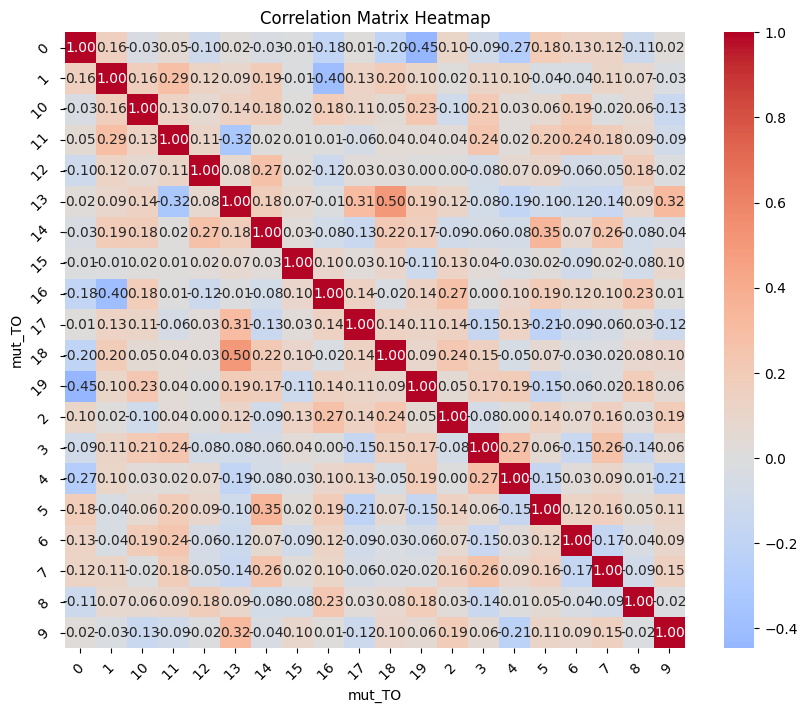

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'correlation_matrix' is your DataFrame with correlations

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)

# Adjust the plot
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show the plot
plt.show()

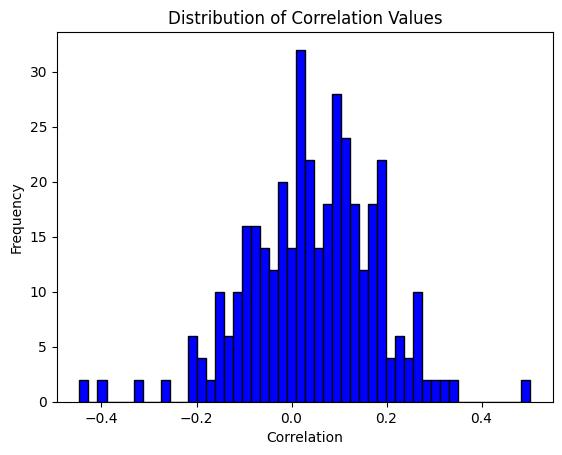

In [32]:
# Flatten the correlation matrix and filter out self-correlations
correlation_values = correlation_matrix.values.flatten()
correlation_values = correlation_values[correlation_values != 1]

# Plot histogram
plt.hist(correlation_values, bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Correlation Values')
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.show()

In [33]:
threshold = np.mean(correlation_values)
print(threshold)
correlation_matrix.head()

0.04359070385253355


mut_TO,0,1,10,11,12,13,14,15,16,17,18,19,2,3,4,5,6,7,8,9
mut_TO,,,,,,,,,,,,,,,,,,,,
0,1.000000,0.158231,-0.029998,0.053092,-0.102044,0.020123,-0.033915,-0.008987,-0.183318,0.012627,-0.203224,-0.446393,0.104889,-0.085564,-0.267722,0.180910,0.131014,0.119733,-0.113450,0.021210
1,0.158231,1.000000,0.164711,0.285589,0.118980,0.085484,0.191133,-0.008433,-0.399181,0.134922,0.197115,0.104810,0.015373,0.114623,0.103539,-0.040749,-0.044301,0.114554,0.073810,-0.027788
10,-0.029998,0.164711,1.000000,0.130542,0.067135,0.136370,0.176916,0.016635,0.182197,0.108829,0.050080,0.231252,-0.099454,0.207646,0.027001,0.063834,0.186549,-0.015082,0.063226,-0.133155
11,0.053092,0.285589,0.130542,1.000000,0.111017,-0.319245,0.016750,0.013795,0.009966,-0.059959,0.041637,0.043946,0.037292,0.238602,0.019312,0.195229,0.242118,0.178516,0.092481,-0.086711
12,-0.102044,0.118980,0.067135,0.111017,1.000000,0.075965,0.268288,0.024635,-0.115509,0.028476,0.030812,0.000079,0.004661,-0.077140,0.071167,0.088809,-0.063241,-0.053529,0.178483,-0.016530


In [34]:
import networkx as nx

In [35]:
G = nx.Graph()

# Assuming feat_df is your dataframe with the nodes and their attributes
# Assuming correlation_matrix is a pandas DataFrame with your correlations

# Add nodes with all attributes from feat_df, represented by 'Group' and 'mut_TO'
for idx, row in feat_df.iterrows():
    node_label = (row['Group'], row['mut_TO'])
    G.add_node(node_label, attr_dict=row.to_dict())

# Define a threshold for adding edges
threshold = 0.1  # Adjust this threshold as needed

# Add edges based on the correlation matrix and threshold, but exclude edges where mut_TO is the same
for i, row_i in feat_df.iterrows():
    for j, row_j in feat_df.iterrows():
        if i != j and (row_i['mut_TO'] != row_j['mut_TO'] and row_i['Group'] != row_j['Group']):  # avoid self-loops and edges with same mut_TO
            corr_value = correlation_matrix.at[row_i['mut_TO'], row_j['mut_TO']]
            if corr_value > threshold:
                G.add_edge((row_i['Group'], row_i['mut_TO']), (row_j['Group'], row_j['mut_TO']), weight=corr_value)

# List every edge above the threshold
edges_above_threshold = []
for (node1, node2, data) in G.edges(data=True):
    if data['weight'] > threshold:
        node1_group, node1_mut_TO = node1
        node2_group, node2_mut_TO = node2
        edge_weight = data['weight']
        edges_above_threshold.append({
            'node1_group': node1_group,
            'node1_mut_TO': node1_mut_TO,
            'node2_group': node2_group,
            'node2_mut_TO': node2_mut_TO,
            'edge_weight': edge_weight
        })
print("Number of edges in the graph:", G.number_of_edges())
# Output the edges information
for edge in edges_above_threshold:
    print(edge)


Number of edges in the graph: 182708
{'node1_group': 22, 'node1_mut_TO': '16 ', 'node2_group': 2, 'node2_mut_TO': '8 ', 'edge_weight': 0.23155373347473052}
{'node1_group': 22, 'node1_mut_TO': '16 ', 'node2_group': 41, 'node2_mut_TO': '17 ', 'edge_weight': 0.14219252667024523}
{'node1_group': 22, 'node1_mut_TO': '16 ', 'node2_group': 24, 'node2_mut_TO': '10 ', 'edge_weight': 0.18219650184396888}
{'node1_group': 22, 'node1_mut_TO': '16 ', 'node2_group': 26, 'node2_mut_TO': '8 ', 'edge_weight': 0.23155373347473052}
{'node1_group': 22, 'node1_mut_TO': '16 ', 'node2_group': 55, 'node2_mut_TO': '8 ', 'edge_weight': 0.23155373347473052}
{'node1_group': 22, 'node1_mut_TO': '16 ', 'node2_group': 44, 'node2_mut_TO': '5 ', 'edge_weight': 0.19411799515759637}
{'node1_group': 22, 'node1_mut_TO': '16 ', 'node2_group': 45, 'node2_mut_TO': '19 ', 'edge_weight': 0.13751813892307346}
{'node1_group': 22, 'node1_mut_TO': '16 ', 'node2_group': 11, 'node2_mut_TO': '7 ', 'edge_weight': 0.10174391710673404}
{

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



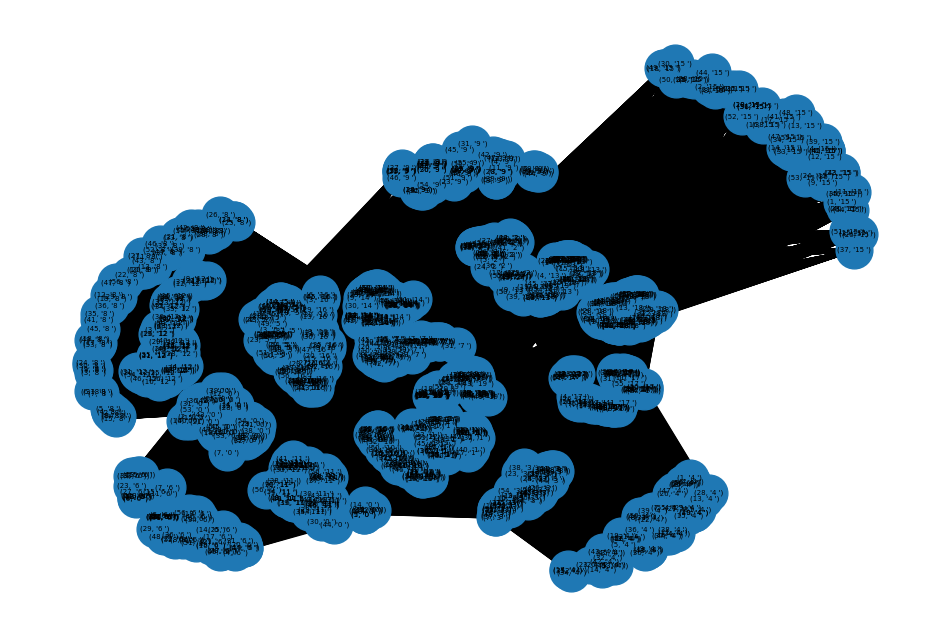

In [36]:
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, width=2)
nx.draw_networkx_labels(G, pos, font_size=5, font_family='sans-serif')
plt.axis('off')
plt.show()

In [37]:
'''
page rank:					networkx.pagerank(G)
degree:						Graph.degree( optional:specific nodes), returns a DegreeView
strength:					?
eigenvector centrality:		networkx.eigenvector_centrality(G), return nodes dictionary
clustering coefficient:		nx.clustering(G), return nodes dictionary
closeness centrality(?):	nx.closeness_centrality(G), return nodes dictionary
normalized edge weigts:		?
'''

PageRank = nx.pagerank(G) #node dictionary is returned (also 1042 long list basically)
degrees = G.degree() #degreeView item is returned (1042 item long list basically)
eigenCentrality = nx.eigenvector_centrality(G) #node dictionary is returned (also 1042 long list basically)
clusteringCoeff = nx.clustering(G) #node dictionary is returned (also 1042 long list basically)
closenessCentrality = nx.closeness_centrality(G) #node dictionary is returned (also 1042 long list basically)

feat_df.head(5)

,Group,mut_TO,sasa_ub,sasa_bnd,sasa_wh,sasa_fcc,h_bnd,sasaDelta
0,22,16,0.148837,0.527308,0.499096,0.386223,9.0,403.915772
1,38,14,0.435753,0.379275,0.462462,0.515963,10.0,640.689697
2,2,3,0.284387,0.246766,0.438378,0.562541,9.0,627.192383
3,10,3,0.366824,0.362390,0.542540,0.579933,9.0,611.552978
4,26,13,0.343511,0.544290,0.576504,0.514639,6.0,502.447754


In [38]:
'''
page rank:					networkx.pagerank(G), return nodes dictionary						PageRank
degree:						Graph.degree( optional:specific nodes), returns a DegreeView		degrees
eigenvector centrality:		networkx.eigenvector_centrality(G), return nodes dictionary			eigenCentrality
clustering coefficient:		nx.clustering(G), return nodes dictionary							clusteringCoeff
closeness centrality(?):	nx.closeness_centrality(G), return nodes dictionary					closenessCentrality
'''
arr = []
# 55 x 19
for i in range(len(feat_df)):
    groupN = feat_df["Group"].iloc[i]
    mutN = feat_df["mut_TO"].iloc[i]
    arr.append(PageRank[((groupN, f'{mutN}'))])
print(len(arr))
feat_df.insert(8, "Page Rank", arr)
################################################################
arr = []
# 55 x 19
for i in range(len(feat_df)):
    groupN = feat_df["Group"].iloc[i]
    mutN = feat_df["mut_TO"].iloc[i]
    arr.append(eigenCentrality[((groupN, f'{mutN}'))])
print(len(arr))
feat_df.insert(9, "Eigen Centrality", arr)
################################################################
arr = []
# 55 x 19
for i in range(len(feat_df)):
    groupN = feat_df["Group"].iloc[i]
    mutN = feat_df["mut_TO"].iloc[i]
    arr.append(clusteringCoeff[((groupN, f'{mutN}'))])
print(len(arr))
feat_df.insert(10, "Clustering Coefficient", arr)
################################################################
arr = []
# 55 x 19
for i in range(len(feat_df)):
    groupN = feat_df["Group"].iloc[i]
    mutN = feat_df["mut_TO"].iloc[i]
    arr.append(closenessCentrality[((groupN, f'{mutN}'))])
print(len(arr))
feat_df.insert(11, "closenessCentrality", arr)
################################################################
degree_values = [v for k, v in degrees]
print(len(degree_values))
feat_df.insert(12, "Degrees", degree_values)

1060
1060
1060
1060
1060


In [39]:
'''#normalized = (x-min(x))/(max(x)-min(x))
feat_df["Degrees"]=(feat_df["Degrees"] - feat_df["Degrees"].min())  /(feat_df["Degrees"].max() - feat_df["Degrees"].min())'''
feat_df.head(10)

,Group,mut_TO,sasa_ub,sasa_bnd,sasa_wh,sasa_fcc,h_bnd,sasaDelta,Page Rank,Eigen Centrality,Clustering Coefficient,closenessCentrality,Degrees
0,22,16,0.148837,0.527308,0.499096,0.386223,9.0,403.915772,0.001102,0.033379,0.304222,0.622575,417
1,38,14,0.435753,0.379275,0.462462,0.515963,10.0,640.689697,0.001345,0.037247,0.311636,0.622941,418
2,2,3,0.284387,0.246766,0.438378,0.562541,9.0,627.192383,0.001085,0.033296,0.407093,0.603763,364
3,10,3,0.366824,0.362390,0.542540,0.579933,9.0,611.552978,0.001088,0.033375,0.407196,0.604107,365
4,26,13,0.343511,0.544290,0.576504,0.514639,6.0,502.447754,0.001317,0.032144,0.402085,0.605143,368
5,48,14,0.278701,0.467215,0.484597,0.409111,9.0,507.428711,0.001342,0.037150,0.311947,0.622575,417
6,43,13,0.443606,0.292266,0.346614,0.402781,7.0,691.056396,0.001321,0.032239,0.402881,0.605489,369
7,2,8,0.251485,0.387185,0.546401,0.608880,10.0,534.735596,0.000528,0.011335,0.198658,0.484890,148
8,40,1,0.778706,0.242724,0.249340,0.252999,8.0,902.337158,0.001266,0.046776,0.341702,0.684994,572
9,54,3,0.236531,0.162949,0.326792,0.480447,9.0,645.103516,0.001087,0.033399,0.407256,0.604107,365


In [40]:
for i in feat_df.columns:
    print(f"{i} (min, max): ({feat_df[i].min()}, {feat_df[i].max()})")

Group (min, max): (1, 56)
mut_TO (min, max): (0 , 9 )
sasa_ub (min, max): (0.0, 1.0)
sasa_bnd (min, max): (0.0, 1.0)
sasa_wh (min, max): (0.0, 1.0)
sasa_fcc (min, max): (0.0, 1.0)
h_bnd (min, max): (4.0, 12.0)
sasaDelta (min, max): (289.45068400000036, 902.3371580000003)
Page Rank (min, max): (0.00029851845386363, 0.0013462672585325187)
Eigen Centrality (min, max): (0.008629152039442214, 0.046796164155518974)
Clustering Coefficient (min, max): (0.19599129330672954, 0.6187286397812714)
closenessCentrality (min, max): (0.4432817078275429, 0.684993531694696)
Degrees (min, max): (104, 572)


In [41]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(feat_df['mut_TO'])
# Drop column B as it is now encoded
feat_df = feat_df.drop('mut_TO',axis = 1)
# Join the encoded df
feat_df = feat_df.join(one_hot)
feat_df.head()
print(feat_df.columns)

Index(['Group', 'sasa_ub', 'sasa_bnd', 'sasa_wh', 'sasa_fcc', 'h_bnd',
       'sasaDelta', 'Page Rank', 'Eigen Centrality', 'Clustering Coefficient',
       'closenessCentrality', 'Degrees', '0 ', '1 ', '10 ', '11 ', '12 ',
       '13 ', '14 ', '15 ', '16 ', '17 ', '18 ', '19 ', '2 ', '3 ', '4 ', '5 ',
       '6 ', '7 ', '8 ', '9 '],
      dtype='object')


In [42]:
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [43]:
X_train, X_test, y_train, y_test = train_test_split(feat_df, label_df, test_size=0.2, random_state=42)

In [44]:
dtrain = xgb.DMatrix(X_train, label=y_train)

In [46]:
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.05],
    'n_estimators': [100, 200, 300],
    'colsample_bytree': [0.3, 0.7],
    'alpha': [0.8, 1, 1.2, 1.5]  # Example values for alpha
}

# Initialize the XGBoost regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror')

# Initialize the GridSearchCV object
grid_cv = GridSearchCV(estimator=xg_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit to the data
grid_cv.fit(X_train, y_train)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", grid_cv.best_params_)
print("Lowest RMSE found: ", (-grid_cv.best_score_)**(1/2))

Best parameters found:  {'alpha': 1.2, 'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Lowest RMSE found:  1.1799990801968174


In [47]:
xg_reg_tuned = xgb.XGBRegressor(objective ='reg:squarederror', 
                          colsample_bytree = 0.7, 
                          learning_rate = 0.1,
                          max_depth = 3, 
                          alpha = 1, 
                          n_estimators = 300)

# Fit the regressor to the training set
xg_reg_tuned.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = xg_reg_tuned.predict(X_test)

# Compute and print the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 0.9560595514613921
R-squared: 0.7649736686247437


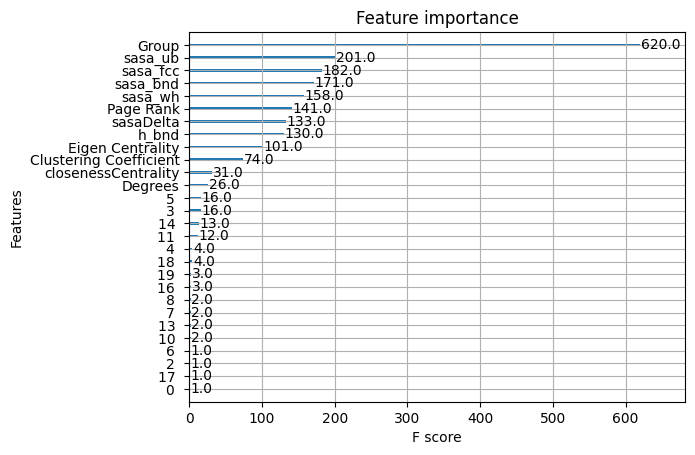

In [48]:
xgb.plot_importance(xg_reg_tuned)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

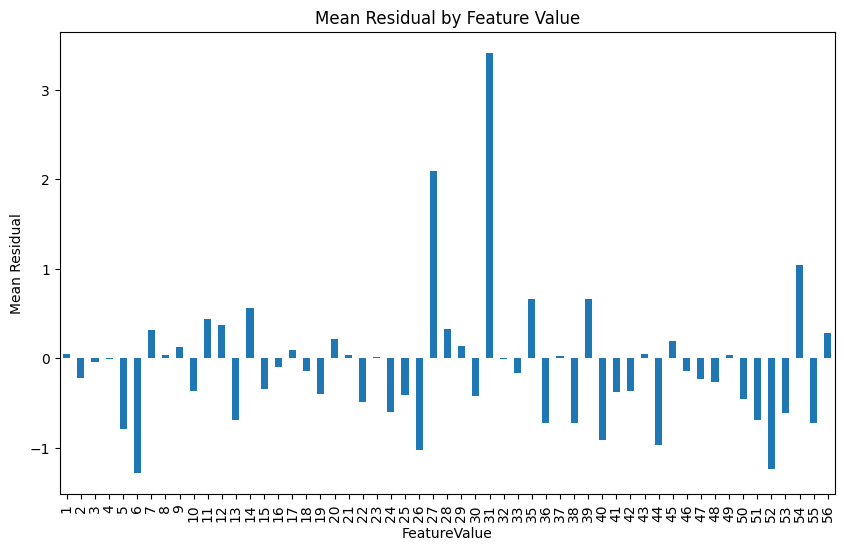

In [63]:
y_test_array = y_test_array.flatten()
residuals = y_test_array - y_pred
# Add the residuals and the feature of interest to a new DataFrame
# Replace 'feature_name' with the name of your feature
analysis_df = pd.DataFrame({'FeatureValue': X_test['Group'], 'Residual': residuals})

# Group by the feature and calculate mean residual
grouped_residuals = analysis_df.groupby('FeatureValue')['Residual'].mean()

# Plot the results
grouped_residuals.plot(kind='bar', figsize=(10, 6))
plt.ylabel('Mean Residual')
plt.title('Mean Residual by Feature Value')
plt.show()

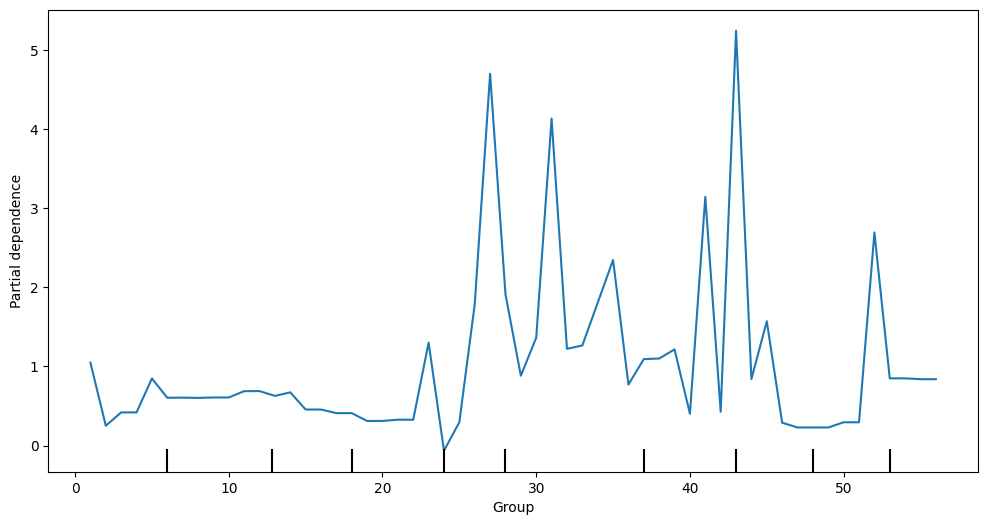

In [70]:
from sklearn.inspection import PartialDependenceDisplay

# Assuming 'xg_reg' is your trained XGBoost model and 'X_test' is your test dataset
feature_to_plot = 'Group'  # Replace with your actual feature name if different

# Create the partial dependence plot
fig, ax = plt.subplots(figsize=(12, 6))
PartialDependenceDisplay.from_estimator(xg_reg_tuned, X_test, features=[feature_to_plot], ax=ax)
plt.show()